In [97]:
import numpy as np
from matplotlib import pyplot as plt

# Exercises:

### a. MDCT:
In this exercise you will implement a time-to-frequency mapping using the MDCT. You will verify that the mapping leads to perfect reconstruction and that the fast implementation is significantly faster than straightforward implementation. Your fast MDCTIIMDCT implementation will be useful for later exercises.
1. Program functions to carry out the MDCT and IMDCT using the transform definitions.

In [98]:
def mdct_naive(x, window = None):
    N = len(x)
    if window is None: window = np.ones(N)
    if N%2 != 0: raise ValueError("N deve ser inteiro par")
    n_0 = (N/2 + 1)/2
    X = np.zeros(N//2)
    for k in range(N//2):
        for n in range(N):
            arg =  2 * np.pi * (n+n_0) * (k+0.5) / N
            X[k] += window[n] * x[n] * np.cos(arg)
            # print(f'k={k}, arg={arg}')
    if len(X) != N//2: raise ValueError(f"deve ter tamanho N/2, len = {len(X)}")
    return X

# pela definição formal
def mdct_vanilla(x, window = None):
    N = len(x)
    if window is None: window = np.ones(N)
    if N%2 != 0: raise ValueError("N deve ser inteiro par")
    K = np.arange(N/2)
    n_0 = (N/2 + 1)/2
    n = np.arange(N)
    X = [np.sum(x * window * np.cos(2 * np.pi * (n + n_0)*(k+1/2) / N )) for k in K]
    if len(X) != len(K): raise ValueError(f"deve ter tamanho N/2, len = {len(X)}")
    return X

def imdct_naive(X, window = None):
    K = len(X)
    N = 2*K
    if window is None: window = np.ones(N)
    n_0 = (N/2 + 1)/2
    x = np.zeros(N)
    for n in range(N):
        for k in range(K):
            arg = 2 * np.pi * (n+n_0)*(k+0.5) / N
            x[n] += window[n] * (4/N) * X[k] * np.cos(arg)
    if len(x) != N: raise ValueError(f"deve ter tamanho N, len = {len(x)}")
    return x

def imdct_vanilla(X, window = None):
    K = len(X)
    N = 2*K
    if window is None: window = np.ones(N)
    k = np.arange(K)
    n_0 = (N/2 + 1)/2
    x = [window[n] * (4/N) * np.sum(X * np.cos(2 * np.pi * (n + n_0)*(k+1/2) / N )) for n in np.arange(N)]
    if len(x) != N: raise ValueError(f"deve ter tamanho N, len = {len(x)}")
    return x

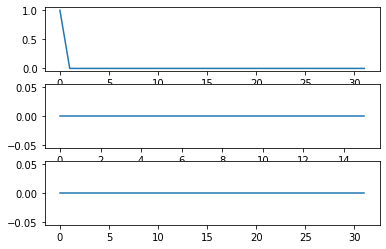

In [104]:
X = [1,1,1,1]
# vanilla = imdct_vanilla(X)
# naive = imdct_naive(X)
# print(vanilla)
# print(naive)

x = np.zeros(32)
x[0] = 1
fig, ax = plt.subplots(nrows = 3, ncols = 1)
ax[0].plot(x)
X = mdct_naive(x, window=np.hanning(32))
ax[1].plot(X)
ax[2].plot(imdct_naive(X, window=np.hanning(32)))


In [90]:

def pre_twiddle(N):
    return np.exp(-2j * np.pi * np.arange(N) / N)

def post_twiddle(N):
    if N%2 != 0: raise ValueError("N deve ser inteiro par")
    n_0 = 1
    k = np.arange(N/2 - 1)
    return np.exp(-2j * np.pi * (k + 0.5) / N)


def mdct_via_fft(x):
   return np.re(post_twiddle(len(x)) * np.fft.fft(x * pre_twiddle(len(x))))

def imdct():
    return 1